In [1]:
import pandas as pd
import gzip

In [2]:
fname = '../data/reviews_Movies_and_TV_5.json.gz'

In [3]:
def parse(path):
    """parsing gzip file"""
    g = gzip.open(path, 'rb')
    for line in g:
        yield eval(line)

In [4]:
def get_df(path):
    """creating pandas.dataframe from json.gz file"""
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

In [5]:
df = get_df(fname)

In [6]:
# selecting columns of interest
df = df[['reviewText', 'summary', 'overall']]

In [7]:
# renaming the columns
df.columns = ['review', 'summary', 'target']

In [8]:
# converting type of target from flow to int
df.loc[:, 'target'] = df['target'].astype(int)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1697533 entries, 0 to 1697532
Data columns (total 3 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   review   object
 1   summary  object
 2   target   int64 
dtypes: int64(1), object(2)
memory usage: 51.8+ MB


In [10]:
df.tail()

,review,summary,target
1697528,wow $269.99 for the entire series on Blu Ray??...,Way to Expensive!! WB = GREED,1
1697529,"Finally, the holy grail of tv-on-dvd boxsets i...","HOLY BAT-BOXSET, BATMAN... I never thought thi...",5
1697530,Could this be a true or I'm i dreaming batman ...,prayers have been answered because batman 60s ...,5
1697531,I've been a fan of the series since I was a yo...,can't Wait!,5
1697532,People seriously need to wake up and realize t...,The Price is Insane? People Really Need to Wak...,5


<AxesSubplot:>

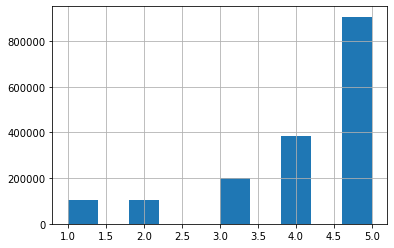

In [11]:
# checking distribution of the target variable
df.target.hist()

In [12]:
# selecting 50k reviews from each class
df = df.groupby(by='target', as_index=False).apply(lambda x: x.sample(50_000))

In [13]:
# resetting index
df = df.reset_index().drop(['level_0', 'level_1'], axis=1)

In [14]:
# shuffling
df = df.sample(frac=1)

In [15]:
df.target.value_counts()

2    50000
3    50000
1    50000
5    50000
4    50000
Name: target, dtype: int64

In [16]:
# saving selected data
df.to_csv('../data/amzn_selected_data.csv', index=False)